In [1]:
import textdistance as td
from ipywidgets import interact
import intervals
from intervals import * 
from intervals import main_objs
import intervals.visualizations as viz
import pandas as pd
import re

In [2]:
ALGORITHMS = [
    "Levenshtein",
    "Hamming",
]

CALCULATIONS = ["Distance", "Similarity"]


algorithm_to_apply = {
        ("Levenshtein", "Distance", True): td.levenshtein.normalized_distance,
        ("Levenshtein", "Similarity", True): td.levenshtein.normalized_similarity,
        ("Levenshtein", "Distance", False): td.levenshtein.distance,
        ("Levenshtein", "Similarity", False): td.levenshtein.similarity,
        
        ("Hamming", "Distance", True): td.hamming.normalized_distance,
        ("Hamming", "Similarity", True): td.hamming.normalized_similarity,
        ("Hamming", "Distance", False): td.hamming.distance,
        ("Hamming", "Similarity", False): td.hamming.similarity,
        
    }

# Distance metrics

[**Levenshtein distance**: ](https://en.wikipedia.org/wiki/Levenshtein_distance) *'The Levenshtein distance between two words is the minimum number of single-character edits (insertions, deletions or substitutions) required to change one word into the other.'*

For Levenshtein distance, the following *edits* are available. This example is drawn from [here](https://github.com/life4/textdistance/blob/master/textdistance/algorithms/edit_based.py):

        * deletion:     ABC -> BC, AC, AB
        * insertion:    ABC -> ABCD, EABC, AEBC..
        * substitution: ABC -> ABE, ADC, FBC..

[**Hamming distance**](https://en.wikipedia.org/wiki/Hamming_distance) '*The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different.*'

**Normalised distance:** *Many distance metrics, like Levenshtein and Hamming distance, represent a count of some kind. While these values are easy to interpret, they are less easy to compare across metrics. Checking the "normalised" box below will normalise the metrics to a value between zero and one, for easier comparison.*

## Exercise

Try entering different pairs of words below to see how their similarity could be calculated ("pesto" and "pasta", for instance). See what happens to the Hamming distance if you add a single letter to the start of otherwise similar words:

In [4]:
@interact
def test_metric(string1="", 
                string2="",
                algorithm=ALGORITHMS,
                calculation=CALCULATIONS,
                normalised=False
               ):

    print(algorithm_to_apply[(algorithm, calculation, normalised)](string1, string2))

interactive(children=(Text(value='', description='string1'), Text(value='', description='string2'), Dropdown(d…

There are *many* different text distance metrics that could be applied to music. For a more complete guide see [here](https://itnext.io/string-similarity-the-basic-know-your-algorithms-guide-3de3d7346227)

# Musical example of distance metrics

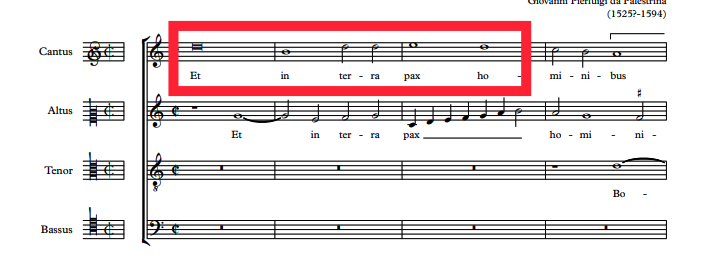

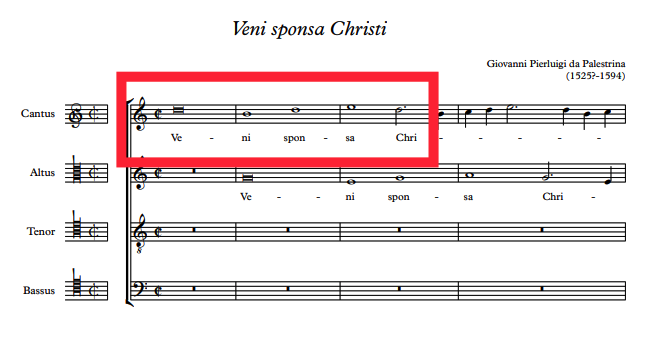

Let's have a look at calculating the Levenshtein distance between these two melodies. First we might try encoding the melodies as strings of letters to represent the notes. This are analogous to the words we tried above:

In [9]:
melody_1 = "dbdffed"
melody_2 = "dbded"

In [10]:
td.levenshtein.distance(melody_1, melody_2)

2

As expected, this gives us a Levenshtein distance of 1 because we can move from the first string of text to the second with a single deletion. Encoding melodies as letters, however, is somewhat inflexible, and won't recognise the same intervallic pattern with different starting pitches. Instead, we might encode the melodies as a series of chromatic intervals:

In [11]:
melody_intervals_1 = [-3, 3, 0, 2, -2]
melody_intervals_2 = [-3, 3, 2, -2]

In [12]:
td.levenshtein.distance(melody_intervals_1, melody_intervals_2)

1

As expected, this gives us the same result as above.

In [13]:
# Select a prefix:

# prefix = 'Music_Files/'
prefix = 'https://crimproject.org/mei/'    

# Add your filename here

mei_file = 'CRIM_Model_0008.mei'

url = prefix + mei_file

piece = importScore(url)

print(piece.metadata)

Successfully imported https://crimproject.org/mei/CRIM_Model_0008.mei
{'title': 'Ave Maria', 'composer': 'Josquin Des Prés'}


## CRIM Distance

We find this using a 'side by side' comparison:  the distance is the total found by subtracting each corresponding interval in the proposed match with the reference series.  

[-3, 3, 0, 2] vs [-3, 3, 0, 1] gives a distance of "1"

In [18]:

piece.distance(n=4) < 3
# piece.distance(n=4)

(3, 0, 1, 1)  (0, 1, 1, -2)  (-1, -1, -1, 1)  \
(3, 0, 1, 1)             True          False            False   
(0, 1, 1, -2)           False           True            False   
(-1, -1, -1, 1)         False          False             True   
(-1, -1, 1, -1)         False          False            False   
(-1, 1, -1, 3)          False          False            False   
...                       ...            ...              ...   
(-3, 1, -1, -4)         False          False            False   
(-1, -1, 1, 0)          False          False            False   
(-2, 1, 1, 0)           False          False            False   
(1, -1, -4, 0)          False          False            False   
(1, 1, 0, 0)            False          False            False   

                 (-1, -1, 1, -1)  (-1, 1, -1, 3)  (1, -1, 3, -1)  \
(3, 0, 1, 1)               False           False           False   
(0, 1, 1, -2)              False           False           False   
(-1, -1, -1, 1)            False           False           False   
(-1, -1, 1, -1)             True           False           False   
(-1, 1, -1, 3)             False            True           False   
...                          ...             ...             ...   
(-3, 1, -1, -4)            False           False           False   
(-1, -1, 1, 0)              True           False           False   
(-2, 1, 1, 0)              False           False           False   
(1, -1, -4, 0)             False           False           False   
(1, 1, 0, 0)               False           False           False   

                 (-1, 3, -1, -1)  (3, -1, -1, 1)  (-1, -1, 1, 1)  \
(3, 0, 1, 1)               False           False           False   
(0, 1, 1, -2)              False           False           False   
(-1, -1, -1, 1)            False           False            True   
(-1, -1, 1, -1)            False           False            True   
(-1, 1, -1, 3)             False           False           False   
...                          ...             ...             ...   
(-3, 1, -1, -4)            False           False           False   
(-1, -1, 1, 0)             False           False            True   
(-2, 1, 1, 0)              False           False           False   
(1, -1, -4, 0)             False           False           False   
(1, 1, 0, 0)               False           False           False   

                 (-1, 1, 1, 1)  ...  (-2, 1, -1, 0)  (4, 0, -1, -1)  \
(3, 0, 1, 1)             False  ...           False           False   
(0, 1, 1, -2)            False  ...           False           False   
(-1, -1, -1, 1)          False  ...           False           False   
(-1, -1, 1, -1)          False  ...           False           False   
(-1, 1, -1, 3)           False  ...           False           False   
...                        ...  ...             ...             ...   
(-3, 1, -1, -4)          False  ...           False           False   
(-1, -1, 1, 0)           False  ...           False           False   
(-2, 1, 1, 0)             True  ...            True           False   
(1, -1, -4, 0)           False  ...           False           False   
(1, 1, 0, 0)             False  ...           False           False   

                 (0, 0, -2, 1)  (7, -3, 1, -1)  (0, -2, 1, 1)  \
(3, 0, 1, 1)             False           False          False   
(0, 1, 1, -2)            False           False          False   
(-1, -1, -1, 1)          False           False          False   
(-1, -1, 1, -1)          False           False          False   
(-1, 1, -1, 3)           False           False          False   
...                        ...             ...            ...   
(-3, 1, -1, -4)          False           False          False   
(-1, -1, 1, 0)           False           False          False   
(-2, 1, 1, 0)            False           False          False   
(1, -1, -4, 0)           False           False          False   
(1, 1, 0, 0)             False    

### Zero Based Distances
Zero based distances are a good idea, since otherwise we overestimate the differences between intervals

In [19]:
mel = piece.melodic('d', True, True)
ngrams = piece.ngrams(df=mel, n=4, exclude=['Rest'])
piece.distance(df=ngrams)

(4, 1, 2, 2)  (1, 2, 2, -3)  (-2, -2, -2, 2)  \
(4, 1, 2, 2)                0              9               13   
(1, 2, 2, -3)               9              0               16   
(-2, -2, -2, 2)            13             16                0   
(-2, -2, 2, -2)            13              8                8   
(-2, 2, -2, 4)             13             14                6   
...                       ...            ...              ...   
(-4, 2, -2, -5)            20             11               13   
(-2, -2, 2, 1)             10             11                5   
(-3, 2, 2, 1)               9              8               10   
(2, -2, -5, 1)             13             16                8   
(2, 2, 1, 1)                5              6               12   

                 (-2, -2, 2, -2)  (-2, 2, -2, 4)  (2, -2, 4, -2)  \
(4, 1, 2, 2)                  13              13              11   
(1, 2, 2, -3)                  8              14               8   
(-2, -2, -2, 2)                8               6              14   
(-2, -2, 2, -2)                0              14               6   
(-2, 2, -2, 4)                14               0              20   
...                          ...             ...             ...   
(-4, 2, -2, -5)               13              11              19   
(-2, -2, 2, 1)                 3              11               9   
(-3, 2, 2, 1)                  8               8              14   
(2, -2, -5, 1)                14              14              12   
(2, 2, 1, 1)                  12              10              10   

                 (-2, 4, -2, -2)  (4, -2, -2, 2)  (-2, -2, 2, 2)  \
(4, 1, 2, 2)                  17               7               9   
(1, 2, 2, -3)                 10              16              12   
(-2, -2, -2, 2)               10               6               4   
(-2, -2, 2, -2)               10              14               4   
(-2, 2, -2, 4)                 8              12              10   
...                          ...             ...             ...   
(-4, 2, -2, -5)                7              19              17   
(-2, -2, 2, 1)                13              11               1   
(-3, 2, 2, 1)                 10              16               6   
(2, -2, -5, 1)                16               6              12   
(2, 2, 1, 1)                  12              10              10   

                 (-2, 2, 2, 2)  ...  (-3, 2, -2, 1)  (5, 1, -2, -2)  \
(4, 1, 2, 2)                 7  ...              13               9   
(1, 2, 2, -3)                8  ...              12              10   
(-2, -2, -2, 2)              8  ...               6              14   
(-2, -2, 2, -2)              8  ...              12              14   
(-2, 2, -2, 4)               6  ...               4              14   
...                        ...  ...             ...             ...   
(-4, 2, -2, -5)             13  ...               7              13   
(-2, -2, 2, 1)               5  ...               9              17   
(-3, 2, 2, 1)                2  ...               4              16   
(2, -2, -5, 1)              16  ...              12              12   
(2, 2, 1, 1)                 6  ...               8              10   

                 (1, 1, -3, 2)  (8, -4, 2, -2)  (1, -3, 2, 2)  \
(4, 1, 2, 2)                 8              13              7   
(1, 2, 2, -3)               11              14             10   
(-2, -2, -2, 2)              7              20              8   
(-2, -2, 2, -2)             15              12              8   
(-2, 2, -2, 4)               7              26             14   
...                        ...             ...            ...   
(-4, 2, -2, -5)             14              25             21   
(-2, -2, 2, 1)              12              15              5   
(-3, 2, 2, 1)               11              20             10   
(2, -2, -5, 1)               7              18             10   
(2, 2, 1, 1)                 7    

In [25]:
piece.melodic(kind='d').fillna('')

[Superius] Altus Tenor Bassus
0.0                Rest  Rest   Rest
4.0             4                   
8.0                Rest  Rest   Rest
12.0            1                   
16.0            2        Rest   Rest
...           ...   ...   ...    ...
1248.0         -2    -3     2      2
1252.0                2             
1256.0         -2     2     2     -2
1272.0          2     1    -2     -5
1288.0          1     1     1      1

[540 rows x 4 columns]

### Now Find Matching nGrams using Distance Comparisons

In [26]:
dist = piece.distance(n=4)
dist_stack = dist.stack().to_frame()
# # # filter distances to threshold.  <2 is good
edit_distance_threshold = 1
distance_factor = edit_distance_threshold + 1
filtered_dist_stack = dist_stack[dist_stack[0] < distance_factor]
filtered_dist = filtered_dist_stack.reset_index()
filtered_dist.rename(columns =  {'level_0':"source", 'level_1':'match'}, inplace = True)

In [27]:
# dist_stack is the list of matches for each ngram
dist_stack.head(25)
# filterted stack now returns just those that are within the threshold
filtered_dist_stack

0
(3, 0, 1, 1)   (3, 0, 1, 1)    0
               (3, -1, 1, 1)   1
(0, 1, 1, -2)  (0, 1, 1, -2)   0
               (1, 1, 1, -2)   1
               (-1, 1, 1, -2)  1
...                           ..
(-2, 1, 1, 0)  (-2, 1, 1, 0)   0
(1, -1, -4, 0) (1, -1, -4, 0)  0
(1, 1, 0, 0)   (1, 1, 0, 1)    1
               (1, 1, -1, 0)   1
               (1, 1, 0, 0)    0

[649 rows x 1 columns]

In [28]:
# clean up and rename columns
filtered_dist

source           match  0
0      (3, 0, 1, 1)    (3, 0, 1, 1)  0
1      (3, 0, 1, 1)   (3, -1, 1, 1)  1
2     (0, 1, 1, -2)   (0, 1, 1, -2)  0
3     (0, 1, 1, -2)   (1, 1, 1, -2)  1
4     (0, 1, 1, -2)  (-1, 1, 1, -2)  1
..              ...             ... ..
644   (-2, 1, 1, 0)   (-2, 1, 1, 0)  0
645  (1, -1, -4, 0)  (1, -1, -4, 0)  0
646    (1, 1, 0, 0)    (1, 1, 0, 1)  1
647    (1, 1, 0, 0)   (1, 1, -1, 0)  1
648    (1, 1, 0, 0)    (1, 1, 0, 0)  0

[649 rows x 3 columns]